In [2]:
import numpy as np
import pandas as pd 
import pylab as pl
from matplotlib import pyplot as plt #画图
from sklearn.cluster import KMeans 
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import pandas_datareader as datareader
import matplotlib.pyplot as plt
import datetime
from mpl_finance import candlestick_ohlc
# from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

reading data from reading_scroll_features table and some data cleaning 

In [6]:
data = pd.read_csv('data/tbl_reading_style.csv')
data = data[data['relative_time'] < 2000]
data.head()


,user_id,reading_session,article_id,scroll_range,max_offset,min_offset,offset_difference,relative_time,reading_duration
0,111,00c29290-338e-42e9-8897-c475c799e1e5,30118783,7116,61,10,51,0,1
1,111,00c29290-338e-42e9-8897-c475c799e1e5,30118783,7116,0,0,0,1,1
2,111,2684b548-a936-46f8-90d7-3941bb9cd096,30345801,6830,203,5,198,0,1
3,111,2684b548-a936-46f8-90d7-3941bb9cd096,30345801,6830,336,0,-336,1,1
4,111,2684b548-a936-46f8-90d7-3941bb9cd096,30367210,5404,650,46,604,0,10


display how each user's reading relative time distributed. 

(7593,)
(7593,)
(7593, 2)


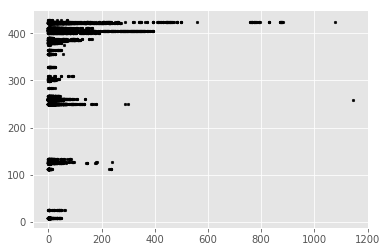

In [7]:
f1 = data['relative_time'].values
print(f1.shape)
f2= data['user_id'].values
print(f2.shape)
x = np.array(list(zip(f1,f2)))
print(x.shape)
plt.scatter(f1,f2, c='black', s=7)
#filter data 1.filtered() 2.sql 



display reading style by users

In [8]:
pd.options.display.max_rows = 1000
filtered_data =  data[(data['user_id'] == 124)]
filtered_data.head()




,user_id,reading_session,article_id,scroll_range,max_offset,min_offset,offset_difference,relative_time,reading_duration
110,124,c163ec0f-3639-49ef-b926-1965202de3be,36537821,4401,417,14,403,0,14
111,124,c163ec0f-3639-49ef-b926-1965202de3be,36537821,4401,2239,471,1768,1,14
112,124,c163ec0f-3639-49ef-b926-1965202de3be,36537821,4401,2828,2263,565,2,14
113,124,c163ec0f-3639-49ef-b926-1965202de3be,36537821,4401,2802,1159,-1643,4,14
114,124,c163ec0f-3639-49ef-b926-1965202de3be,36537821,4401,1114,496,-618,5,14


In [9]:
filtered_data1 = filtered_data[(filtered_data['article_id'] ==36537821 )]
filtered_data2 = filtered_data[(filtered_data['article_id'] ==36551464 )]
filtered_data3 = filtered_data[(filtered_data['article_id'] ==36573970 )]
filtered_data4 = filtered_data[(filtered_data['article_id'] ==36575493 )]
filtered_data5 = filtered_data[(filtered_data['article_id'] ==36575947 )]
filtered_data6 = filtered_data[(filtered_data['article_id'] ==36598140 )]

# + --------------- +
# | article_id      |
# + --------------- +
# | 36537821        |
# | 36551464        |
# | 36573970        |
# | 36575493        |
# | 36575947        |
# | 36598140        |

([<matplotlib.lines.Line2D at 0x1a25f03278>,
  <matplotlib.patches.Rectangle at 0x1a25f353c8>])

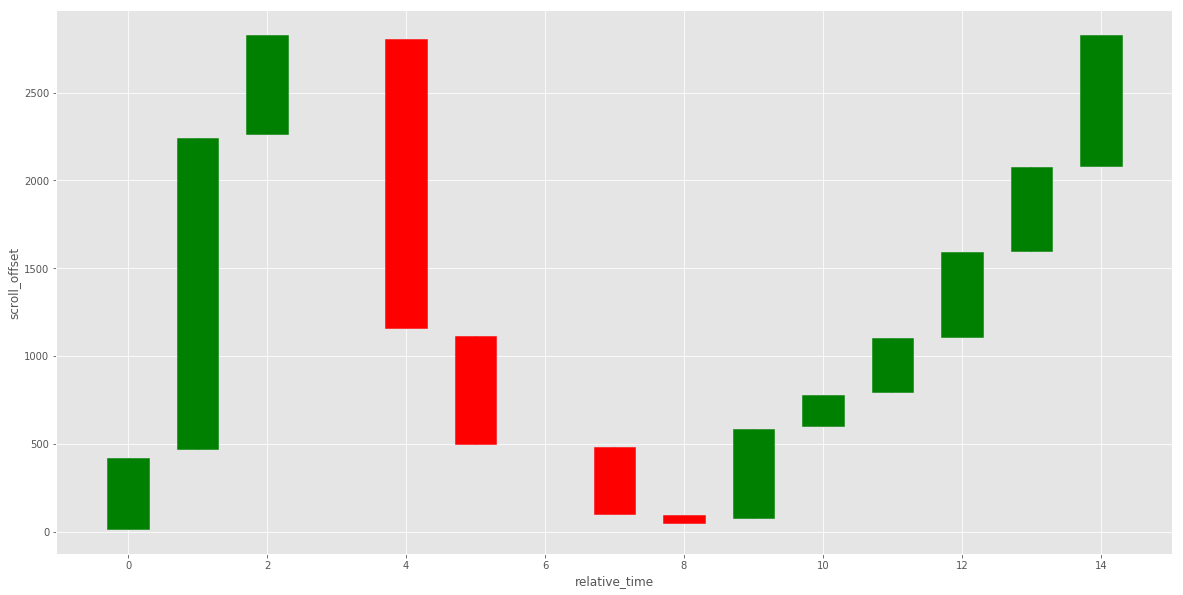

In [10]:
#for i in filtered_data: 
  #  if filtered_data['offset_difference'] > 0:
  ##      ohlc= filtered_data[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()
 #   else:
#        ohlc= filtered_data[['relative_time',  'min_offset','min_offset','max_offset', 'max_offset']].copy()
        

ohlc =pd.DataFrame(columns=['date', 'open', 'high', 'low', 'close'])
for index, row in filtered_data1.iterrows():
    if int(row['offset_difference'])>0:
        ohlc.loc[index]=[row['relative_time'], row['min_offset'], row['max_offset'], row['min_offset'],row['max_offset']]
    else :
        ohlc.loc[index]=[row['relative_time'], row['max_offset'], row['max_offset'], row['min_offset'],row['min_offset']]

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')




([<matplotlib.lines.Line2D at 0x1a258aa438>,
  <matplotlib.patches.Rectangle at 0x1a263a6ac8>])

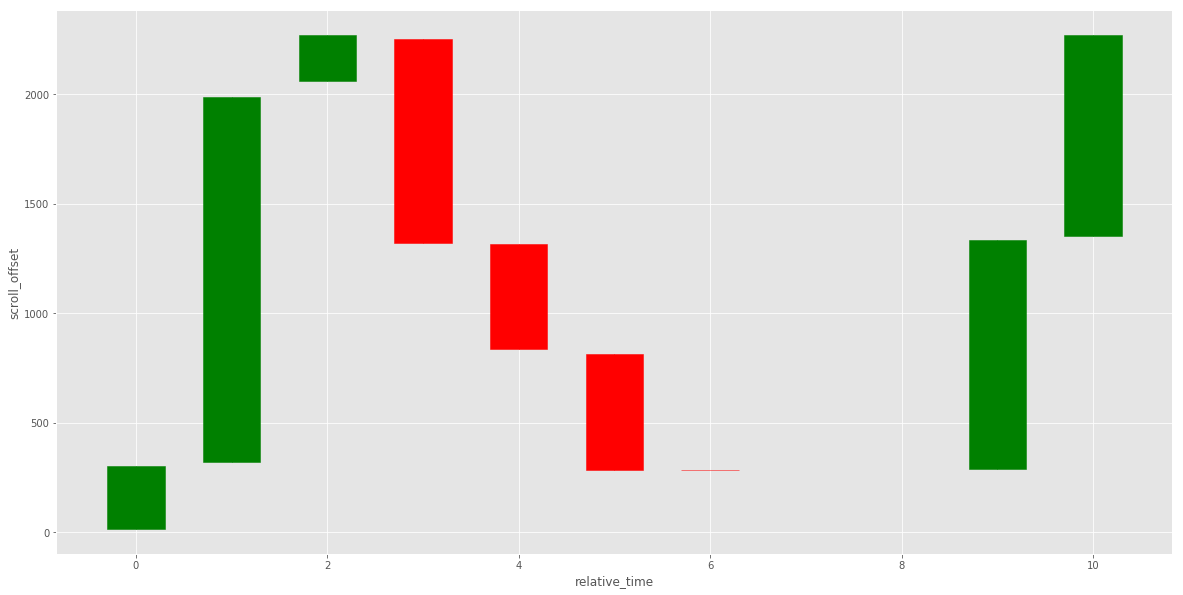

In [11]:
#for i in filtered_data: 
  #  if filtered_data['offset_difference'] > 0:
  ##      ohlc= filtered_data[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()
 #   else:
#        ohlc= filtered_data[['relative_time',  'min_offset','min_offset','max_offset', 'max_offset']].copy()
        

ohlc =pd.DataFrame(columns=['date', 'open', 'high', 'low', 'close'])
for index, row in filtered_data3.iterrows():
    if int(row['offset_difference'])>0:
        ohlc.loc[index]=[row['relative_time'], row['min_offset'], row['max_offset'], row['min_offset'],row['max_offset']]
    else :
        ohlc.loc[index]=[row['relative_time'], row['max_offset'], row['max_offset'], row['min_offset'],row['min_offset']]

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')





([<matplotlib.lines.Line2D at 0x1a264113c8>,
  <matplotlib.patches.Rectangle at 0x1a26441ba8>])

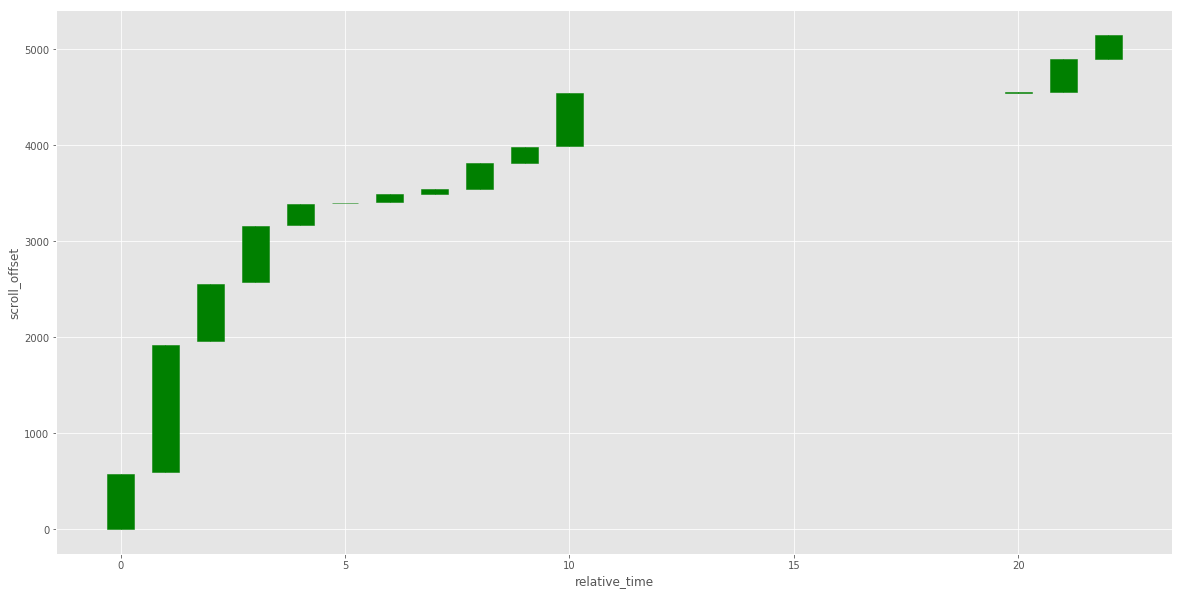

In [12]:
#for i in filtered_data: 
  #  if filtered_data['offset_difference'] > 0:
  ##      ohlc= filtered_data[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()
 #   else:
#        ohlc= filtered_data[['relative_time',  'min_offset','min_offset','max_offset', 'max_offset']].copy()
        

ohlc =pd.DataFrame(columns=['date', 'open', 'high', 'low', 'close'])
for index, row in filtered_data4.iterrows():
    
    if int(row['offset_difference'])>0:
        ohlc.loc[index]=[row['relative_time'], row['min_offset'], row['max_offset'], row['min_offset'],row['max_offset']]
    else :
        ohlc.loc[index]=[row['relative_time'], row['max_offset'], row['max_offset'], row['min_offset'],row['min_offset']]

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')



